Develop a simulation of the system in Example 5.3, simulating the same
situation as in the solution presented. Plot your numerical solution of the
complete problem without any approximation of dead time on the same
graph as the solution derived in the example using approximation.
Implement your own Euler integration loop. For the dead time, you can
interpolate on the values from the past using numpy.interp.

<img src="Trickle-bed reactor.png" width="550" />

$$Parameters$$

In [3]:
V  = 5     #m^3
α  = 12
q  = 0.05  #m3/min
k  = 0.04  #1/min 
θ1 = 0.9   #min
θ2 = 1.1   #min

In [4]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ts = numpy.linspace(0, 1000, 1000)


In [6]:
θ3 = θ1 + θ2
K  = q/(q + V*k)
τ  = V/(q + V*k)

In [7]:
c  = 0 
c2 = 0 

Wasn't sure how to use numpy.interp so some creativity was used

In [24]:
ci = 2000 #kg/m3
c1 = []   #refers to c1'
y  = []

cone = 0
for i in range(len(ts)):
    t = ts[i]
    
    dt = (ts[-1]-ts[0])/len(ts)
                 
    dcdt = (1/V)*(q*ci + α*q*c2 - (1 + α)*q*c - V*k*c)
    c += dcdt*dt
    y.append(c)
    if t >= θ1:
        cone = y[int((t - θ1)/dt)]
    if t >= θ3:
        c2 = y[int((t - θ3)/dt)]
    c1.append(cone)
   

In [9]:
#c1

In [10]:
def u(t):
    if t<0.9:
        return 0
    else:
        return 1

In [11]:
ys = []
for t in ts:
    ca = (400*(1 - 0.99174*numpy.exp(-(t-0.9)/25) - 0.00826*numpy.exp(-(t-0.9)/0.8)))*u(t)
    
    ys.append(ca)

In [12]:
#ys

Text(0, 0.5, 'c1prime(t)')

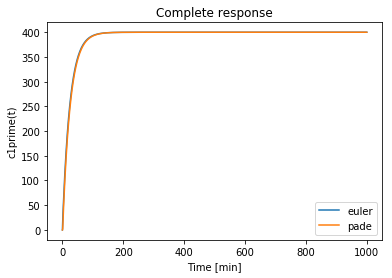

In [13]:
plt.figure(1)
plt.title('Complete response')
plt.plot(ts, c1, label='euler')
plt.plot(ts, ys, label='pade')
plt.legend(loc='best')
plt.xlabel('Time [min]')
plt.ylabel('c1prime(t)')
           

Next, modify your program to read the value of ci from the attached file
data.csv. You can use Pandas to read the file.

In [14]:
import pandas

In [19]:
cit = pandas.read_csv('data.csv')

In [22]:
type(cit)

pandas.core.frame.DataFrame

In [32]:
cit = numpy.array(cit)

In [31]:
cit[-1, 1]

855.6975

In [35]:
len(cit)

228

In [34]:
tspan = numpy.linspace(0, len(cit), len(cit))

In [39]:
c11 = []   #refers to c1'
y1  = []

cone = 0
for i in range(len(tspan)):
    t = tspan[i]
    
    dt = (tspan[-1]-tspan[0])/len(tspan)
    if i>0:
        ci = cit[i, 1] - cit[(i-1), 1]
    else:
        ci = 0
                 
    dcdt = (1/V)*(q*ci + α*q*c2 - (1 + α)*q*c - V*k*c)
    c += dcdt*dt
    y1.append(c)
    if t >= θ1:
        cone = y1[int((t - θ1)/dt)]
    if t >= θ3:
        c2 = y1[int((t - θ3)/dt)]
    c11.append(cone)

Text(0, 0.5, 'c1prime(t)')

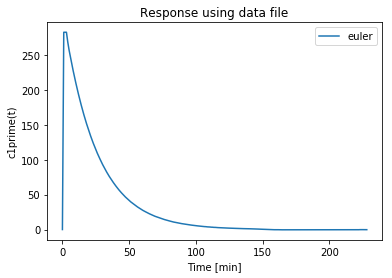

In [40]:
plt.figure(2)
plt.title('Response using data file')
plt.plot(tspan, c11, label='euler')
plt.legend(loc='best')
plt.xlabel('Time [min]')
plt.ylabel('c1prime(t)')